<a href="https://colab.research.google.com/github/vanshika89/The-Sparks-Foundation/blob/main/Task%20-%202%20Unsupervised%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# **The Sparks Foundation**
##### **GRIP August21 - Data Science & Buisness Analytics Internship**
**SUBMITTED BY - Vanshika Dharwal**
___
### **TASK 2 - Prediction using Unsupervised ML**
#### **K Means Clustering**
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. In k means clustering, we have the specify the number of clusters we want the data to be grouped into.
#### **AIM** - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


#### Iris Flowers Classification 


- Loading the imporatant libraries  
- Loading and understanding the Iris data 
- Exploring the data 
- Visualizaing the data  
    - Checking if our data is skewed or not using countplot.  
    - We will plot the grids for every species. 
- Checking Null Values
- Dividing the data 


In [13]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings 
warnings.filterwarnings('ignore') 

from sklearn.datasets import load_iris

In [14]:
iris = load_iris() 
X = iris.data  
y = iris.target 

data = pd.DataFrame(X,columns=iris.feature_names) 
data["Species"] = y 

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
data.shape

(150, 5)

In [16]:
data["Species"].unique()

array([0, 1, 2])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [18]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


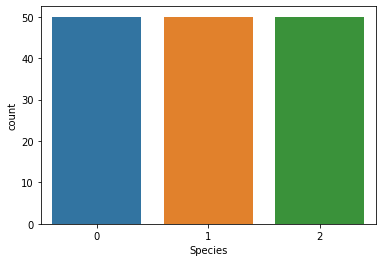

In [19]:
sns.countplot(data["Species"])

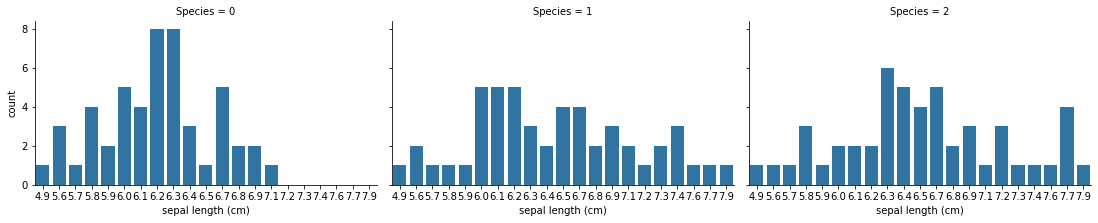

In [20]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'sepal length (cm)')

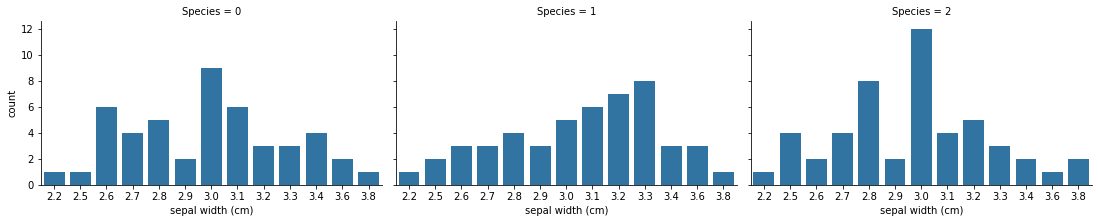

In [21]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'sepal width (cm)')

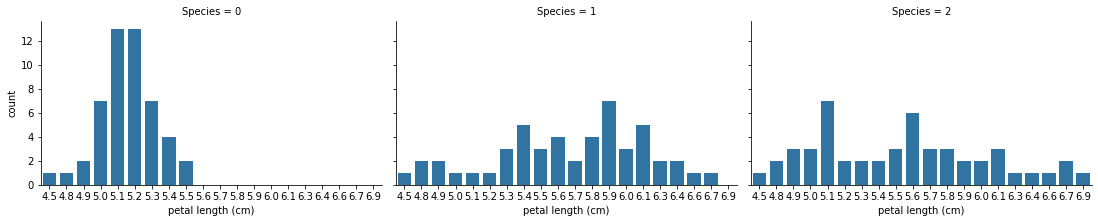

In [22]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal length (cm)')

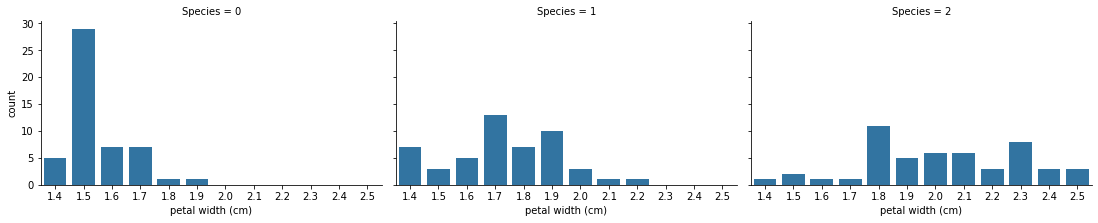

In [23]:
grid = sns.FacetGrid(data, col='Species', size=3.2, aspect=1.6) 
grid.map(sns.countplot, 'petal width (cm)')

In [24]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=42) 

In [26]:
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

(135, 4)
(135,)
(15, 4)
(15,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42) ,
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
} 

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [29]:
def train_and_eval(models, X,y): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X,y)
        loss(y, model.predict(X)) 
        print('*' * 30) 

In [30]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.98
0.9772727272727272
0.9777777777777777
******************************
SVC :
0.98
0.9772727272727272
0.9777777777777777
******************************
DecisionTreeClassifier :
0.5054945054945055
0.6666666666666666
0.674074074074074
******************************
GradientBoostingClassifier :
0.9716553287981861
0.9701805286911669
0.9703703703703703
******************************


In [31]:
gra = GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42) 
gra.fit(X_train, y_train) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
gra.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [33]:
import joblib 

joblib.dump(gra, 'model.pkl') 

grad = joblib.load('model.pkl')